In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [295]:
whisky = pd.read_csv('whisky_advocate.csv')

In [273]:
whisky.shape

(5207, 6)

In [274]:
whisky_brands = set(whisky['brand'].values)
print(f'{len(whisky_brands)} types of whisky')

5089 types of whisky


In [275]:
average_price = float(round(whisky['price'].mean(), 2))
print(f'Average price of whisky is ${average_price}')

Average price of whisky is $360.91


In [276]:
average_rating = float(round(whisky['rating'].mean(), 2))
print(f'Average rating of whisky is {average_rating}')

Average rating of whisky is 86.96


In [277]:
reviewer_ratings = whisky[['reviewer', 'rating']].groupby('reviewer').agg('mean').sort_values('rating', ascending = False)

In [278]:
reviewer_ratings

,rating
reviewer,
David Fleming,88.647887
Adam Polonski,88.136364
Jonny McCormick,87.998918
Susannah Skiver Barton,87.944444
Gavin Smith,87.677752
Jeffery Lindenmuth,87.628440
John Hansell,87.345009
Fred Minnick,86.835979
Davin de Kergommeaux,86.215190


In [279]:
whisky.reviewer.unique()

array(['Davin de Kergommeaux', 'John Hansell', 'Geoffrey Kleinman',
       'Lew Bryson', 'Fred Minnick', 'Susannah Skiver Barton',
       'Jeffery Lindenmuth', 'Jonny McCormick', 'Dave Broom',
       'Gavin Smith', 'Dominic Roskrow', 'David Fleming', 'Adam Polonski'],
      dtype=object)

In [280]:
len(whisky.category.unique())

58

In [281]:
category_count = whisky.groupby('category').count().sort_values('rating',ascending = False)


In [282]:
category_group = whisky[['rating', 'category']].groupby('category').agg('mean')

In [283]:
category_group

,rating
category,
American Malt Whiskey,85.000000
American Whiskey,85.212121
Australian Whisky,85.295455
Austrian Whisky,84.363636
Belgian Whisky,82.333333
Bhutanese Whisky,76.000000
Blended American Whiskey,84.653846
Blended Belgian Whisky,77.000000
Blended French Whisky,83.333333


In [299]:
category_count.agg('mean')['price']

89.77586206896552

In [285]:
categories = pd.merge(category_group, category_count['review'], how = 'outer', on = 'category')

In [300]:
categories_filter = categories[categories['review'] > 89]
categories_filter.sort_values('rating', ascending = False)

,rating,review
category,,
Bourbon/Tennessee,88.408647,717
Japanese Whisky,88.128440,109
Blended Malt Scotch Whisky,88.078652,178
Irish,87.898990,99
Rye Whiskey,87.897674,215
Blended Scotch Whisky,87.709434,265
Single Malt Scotch,87.018528,2051
Single Grain Scotch,86.300000,100
Canadian,86.277567,263


In [287]:
category_rating = whisky[['category', 'rating']]
category_rating

,category,rating
0,Flavored Whisky & Liqueurs,69
1,American Whiskey,69
2,Flavored Whisky & Liqueurs,68
3,Flavored Whisky & Liqueurs,68
4,Flavored Whisky & Liqueurs,67
...,...,...
5202,Craft Whiskey,80
5203,Canadian,80
5204,Bourbon/Tennessee,80
5205,Single Malt Scotch,80


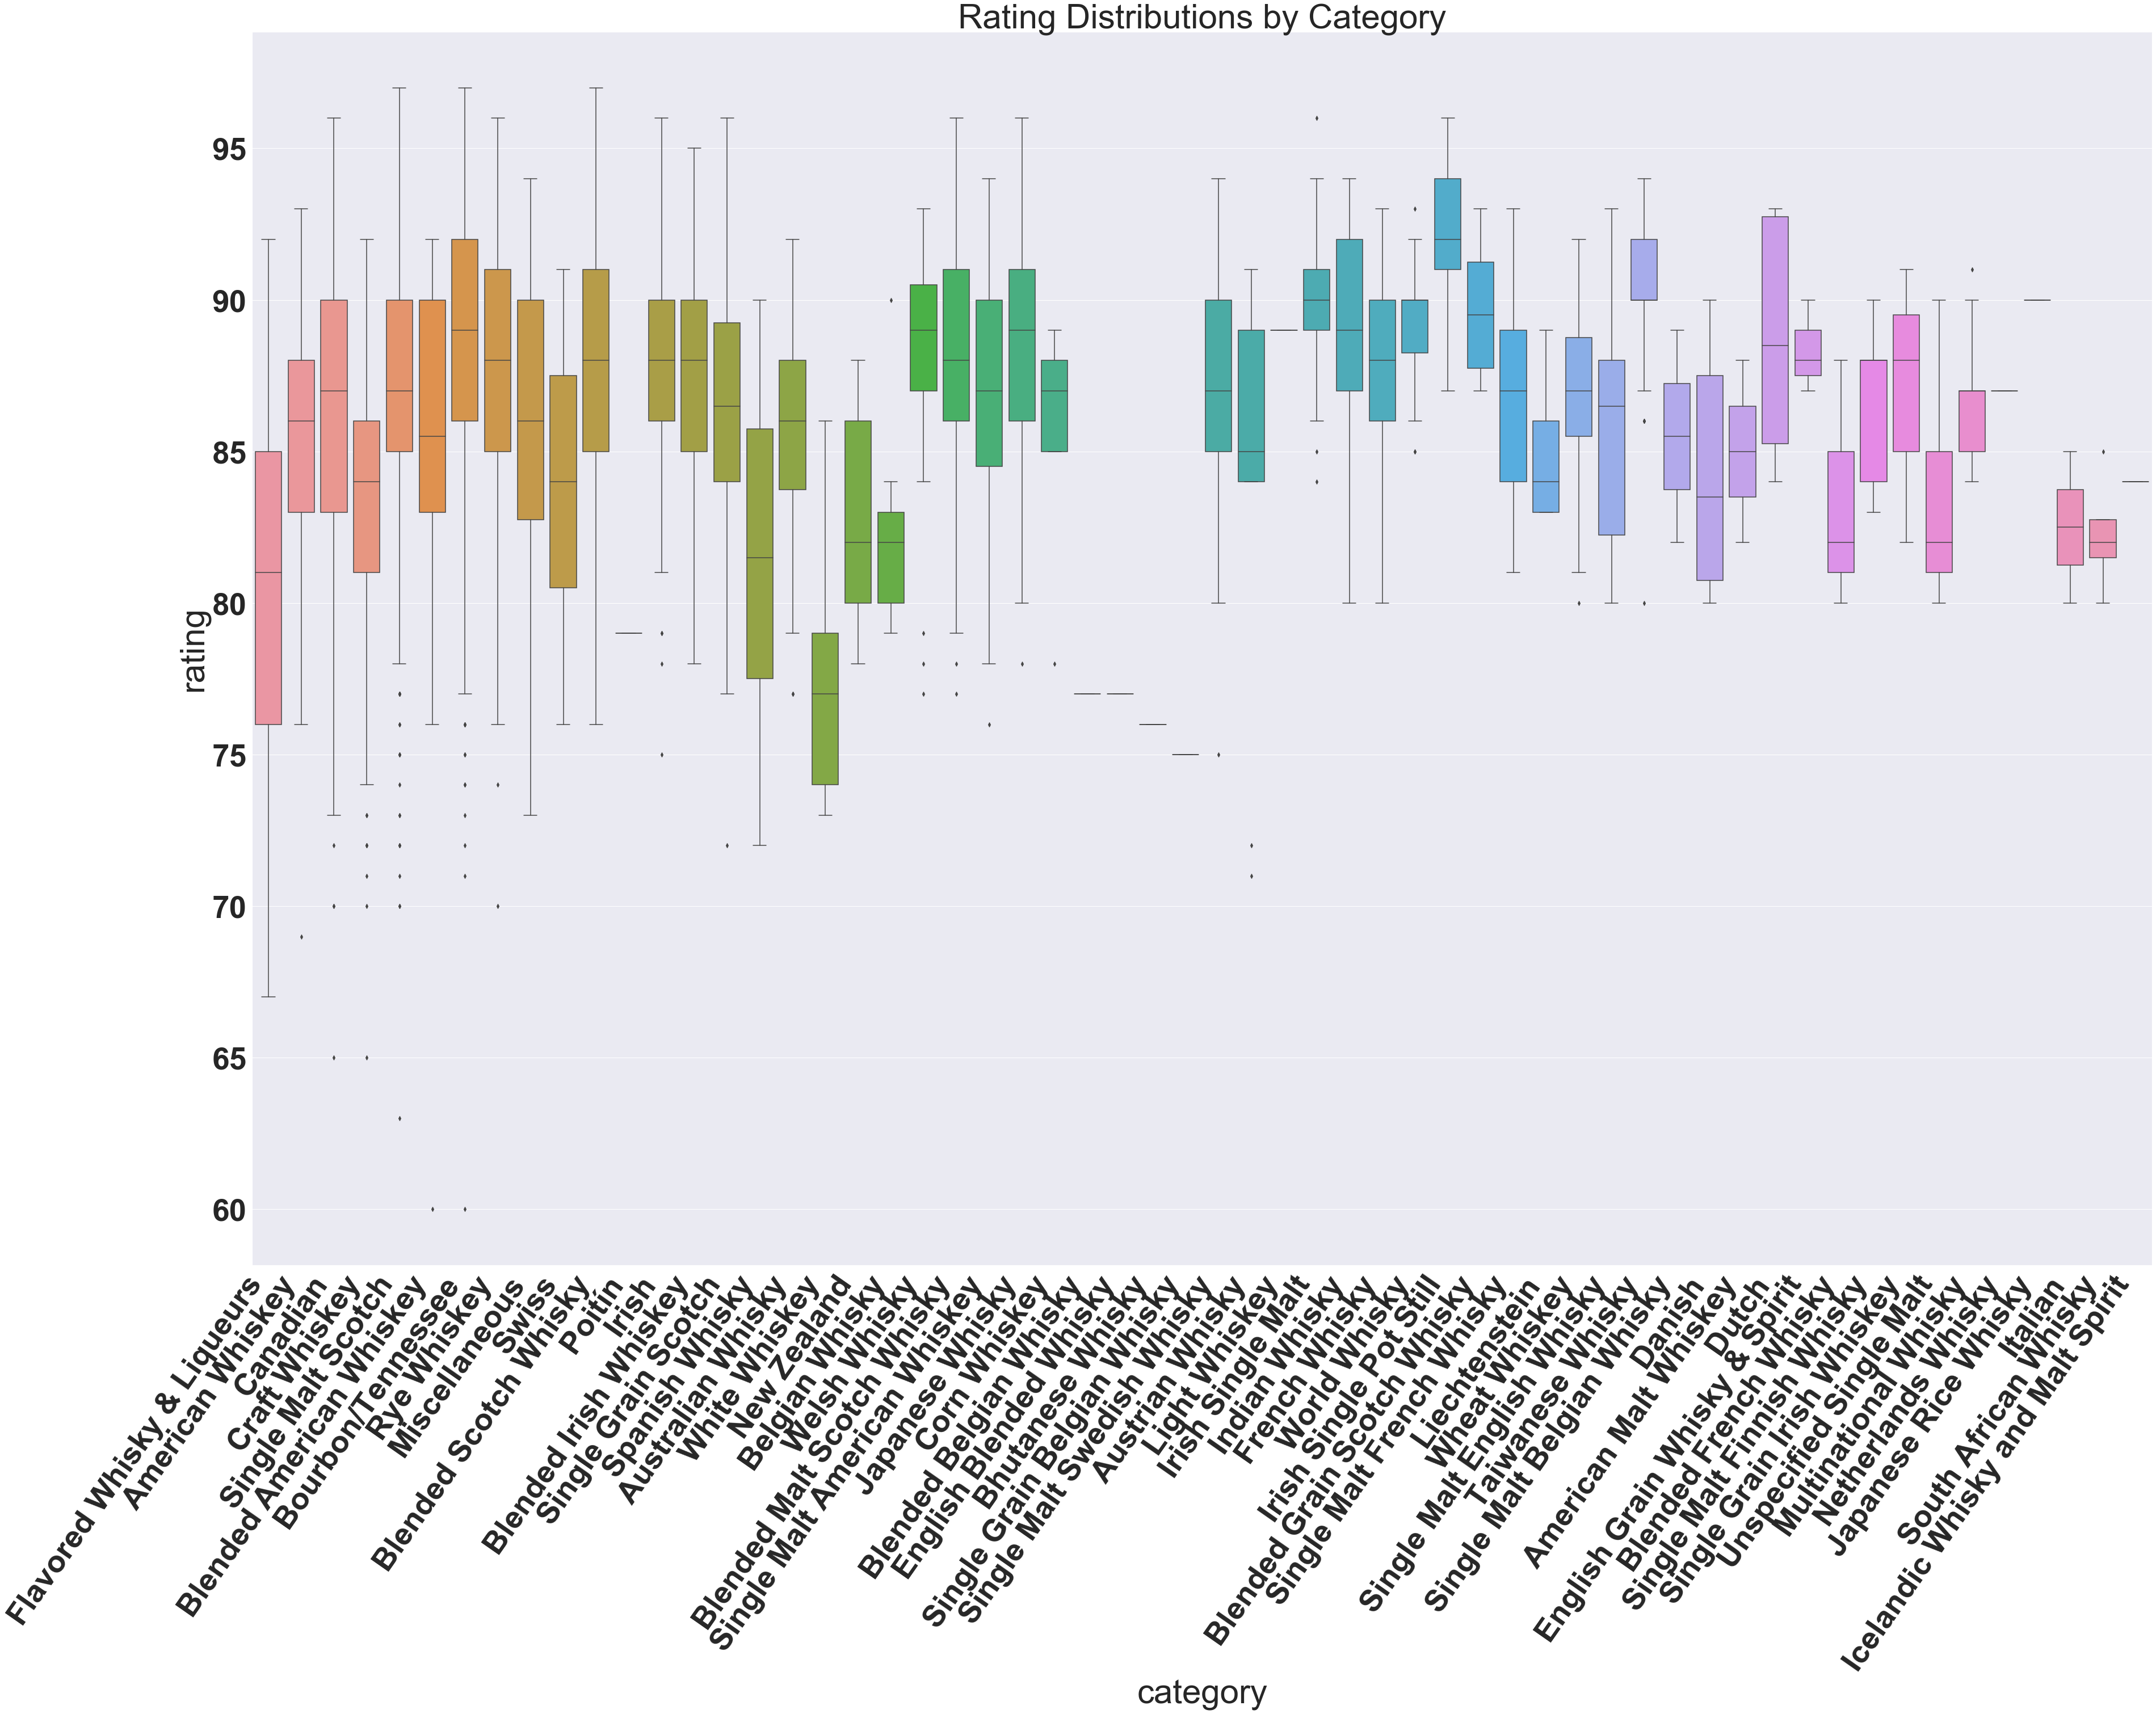

In [288]:
plt.figure(figsize=(60,40))
box2 = sns.boxplot(x = 'category', y = 'rating', data = whisky)
box2.set_xticklabels(box2.get_xticklabels(), rotation=55, horizontalalignment='right')
box2.set_title('Rating Distributions by Category')
sns.set(font_scale = 5)

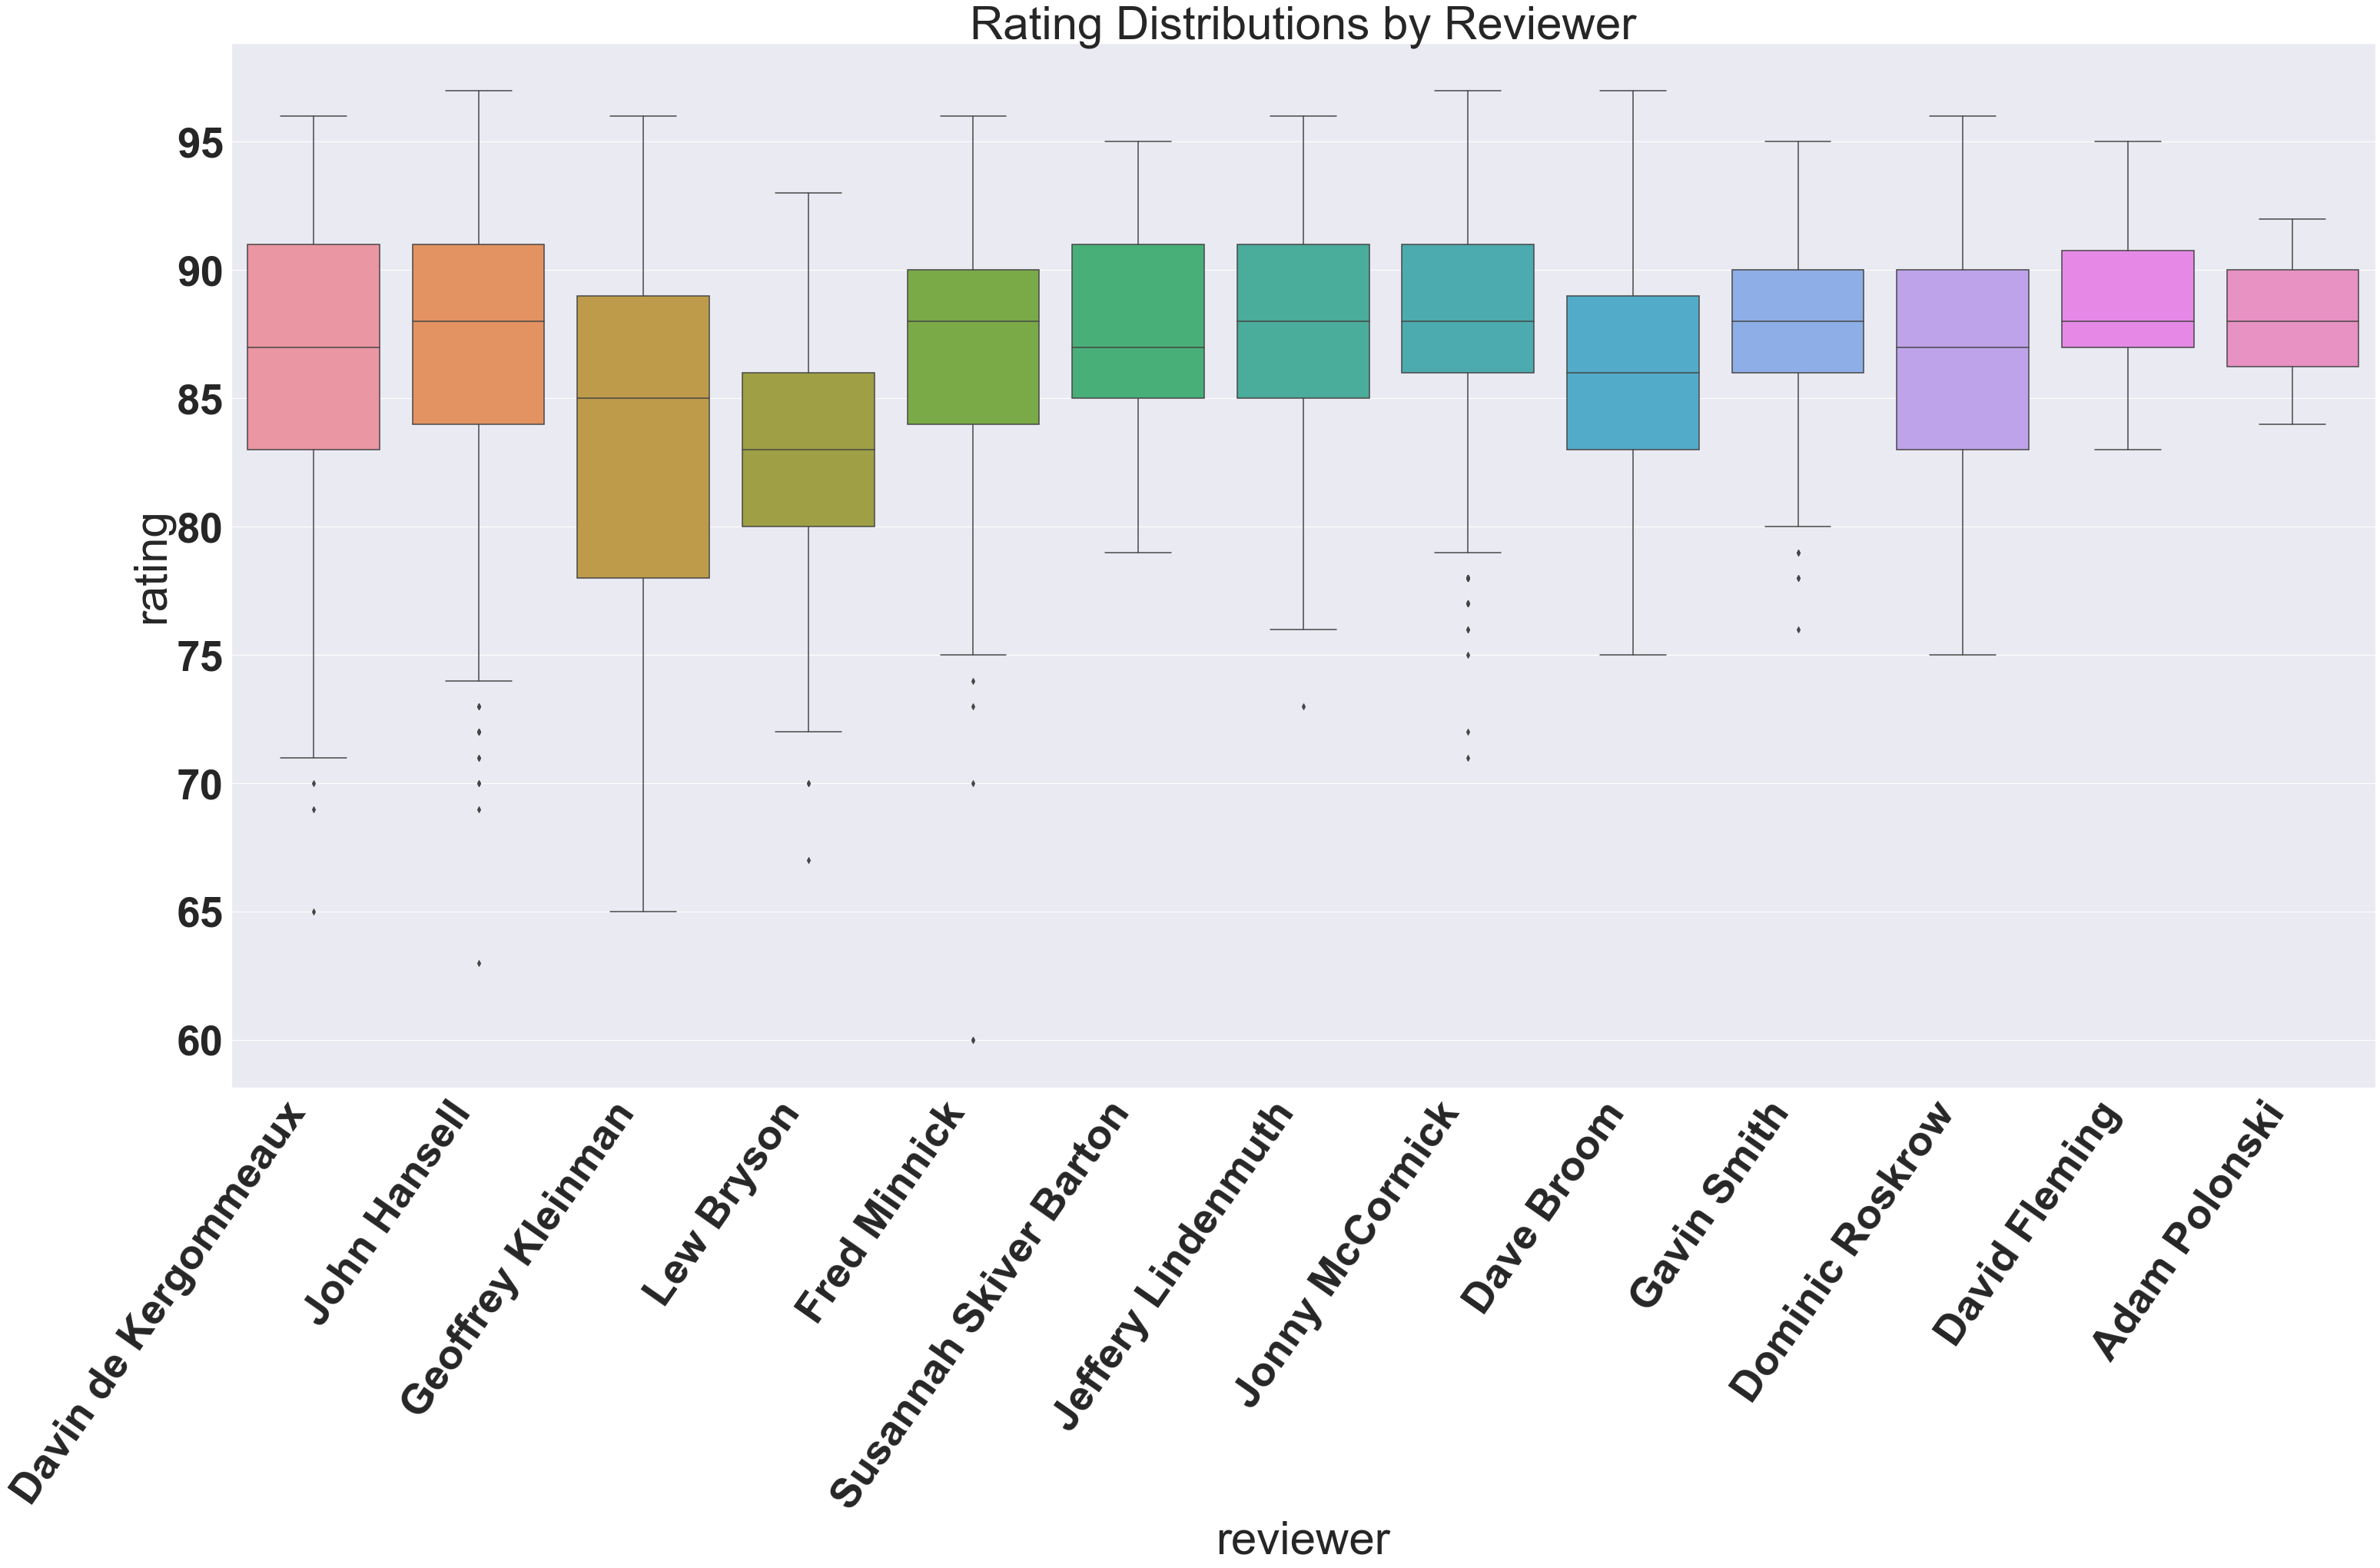

In [289]:
reviewer_rating = whisky[['reviewer', 'rating']]
plt.figure(figsize=(50,25))
box1 = sns.boxplot(x = 'reviewer', y = 'rating', data=whisky)
box1.set_xticklabels(box1.get_xticklabels(), rotation=55, horizontalalignment='right')
box1.set_title('Rating Distributions by Reviewer')
sns.set(font_scale = 3)


In [290]:
whisky[['reviewer', 'category', 'rating']].groupby(['reviewer', 'category']).agg('mean')

rating
reviewer               category                             
Adam Polonski          Bourbon/Tennessee           90.000000
                       Craft Whiskey               87.428571
                       Irish Single Malt           91.000000
                       Miscellaneous               91.000000
                       Multinational Whisky        86.666667
...                                                      ...
Susannah Skiver Barton Single Malt English Whisky  93.000000
                       Single Malt French Whisky   93.000000
                       Single Malt Scotch          89.000000
                       Wheat Whiskey               88.000000
                       World Whisky                88.500000

[203 rows x 1 columns]

(60, 100)

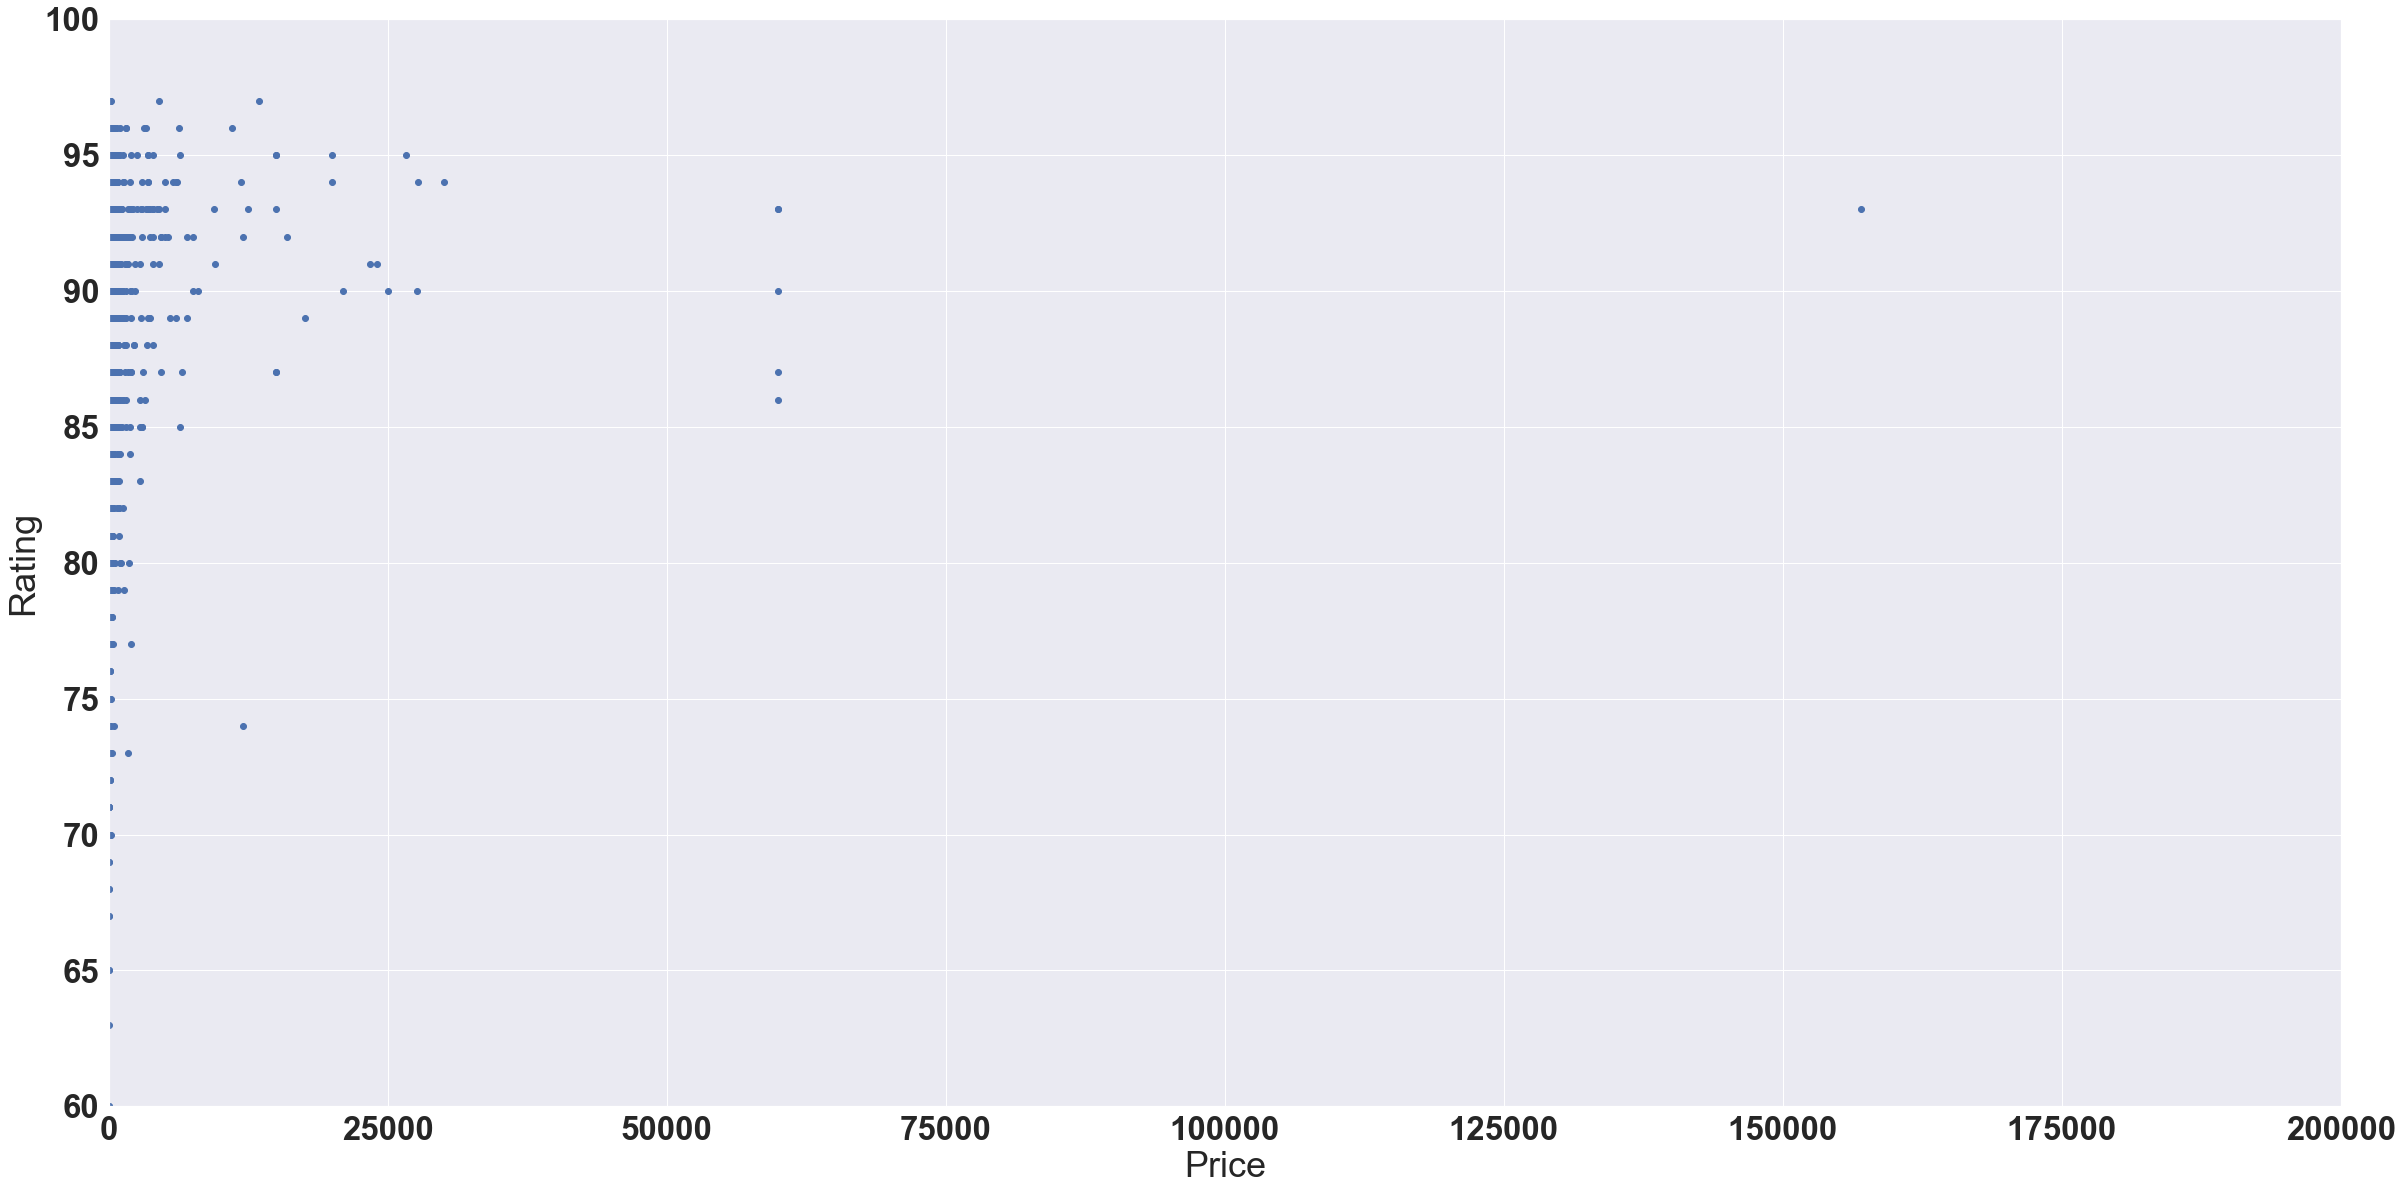

In [297]:
plt.scatter(whisky['price'], whisky['rating'])
plt.xlabel('Price')
plt.ylabel('Rating')
plt.xlim(0, 200000)
plt.ylim(60, 100)

In [264]:
expected_value = whisky[['brand','rating','price']]

In [265]:
expected_value

,brand,rating,price
0,"Cabin Fever, 40%",69,21
1,"Rogue Dead Guy American Whiskey, 40%",69,40
2,"Freedom Moonshine Apple Pie Rye, 20%",68,20
3,"Southern Shine Blueberry Moonshine, 50%",68,16
4,"American Born Dixie Sweet Tea Moonshine, 41.5%",67,22
...,...,...,...
5202,"Vickers Brothers Premium Corn Whiskey, 45%",80,60
5203,"Gibson’s Sterling, 40%",80,26
5204,Cleveland Underground Bourbon Finished with Ap...,80,45
5205,Duncan Taylor 'Rarest of the Rare' (distilled ...,80,225


In [268]:
x = '45.00'

In [270]:
float(x)

45.0

### 